In [1]:
from pathlib import Path
import sys

cwd = Path().resolve()
PROJECT_ROOT = None
for parent in [cwd, *cwd.parents]:
    if (parent / "src").is_dir():
        PROJECT_ROOT = parent
        break

if PROJECT_ROOT is None:
    raise RuntimeError("No se encontró carpeta 'src' en la jerarquía.")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.config import (
    PROJECT_ROOT as CFG_PROJECT_ROOT,
    DATA_DIR,
    RAW_DIR,
    PROCESSED_DIR,
    MODELS_DIR,
)

print("PROJECT_ROOT notebook:", PROJECT_ROOT)
print("PROJECT_ROOT config  :", CFG_PROJECT_ROOT)
print("RAW_DIR:", RAW_DIR)


PROJECT_ROOT notebook: D:\Users\dhcertug\OneDrive - Crystal S.A.S\Documentos\HOME\00_PERSONAL\02_CURSOS\PROYECTO\Proyecto_analisis_intermedio_udea
PROJECT_ROOT config  : D:\Users\dhcertug\OneDrive - Crystal S.A.S\Documentos\HOME\00_PERSONAL\02_CURSOS\PROYECTO\Proyecto_analisis_intermedio_udea\src
RAW_DIR: D:\Users\dhcertug\OneDrive - Crystal S.A.S\Documentos\HOME\00_PERSONAL\02_CURSOS\PROYECTO\Proyecto_analisis_intermedio_udea\src\data\raw


In [12]:
# exploración de variables y negocio

import os
import sys
import importlib
import src.config as cfg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append(os.path.abspath(".."))
import src.config as cfg

# recargar el módulo por si lo importaste antes de editarlo
cfg = importlib.reload(cfg)

from src.config.settings import RAW_DATA_PATH, TARGET_COL, TARGET_COL_ORIGINAL
from src.utils.legacy_preprocessing import basic_cleaning, missing_percentage, get_feature_lists

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
sns.set(style="whitegrid")


In [3]:
# Cargar dataset crudo
import pandas as pd


data_raw = pd.read_csv(RAW_DATA_PATH)
print(data_raw.shape)
data_raw.head()


(437968, 32)


D:\Users\dhcertug\AppData\Local\Temp\ipykernel_10720\263172713.py:5: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(RAW_DATA_PATH)


,anio_mes,semana_anio,Tur,planta_id,seccion_id,maq_id,Tipo_TEJ,Tecnologia,Pas,C,producto_id,categoria_producto,estilo_id,Tal,Col,Tal_Fert,Col_Fert,Componentes,g_art_id,mp_id,MP,mp_categoria,Co_Dano,Descr_Dano,Gr_Dano_Dano,Gr_Dano_Secc,Und_1a,Und_2a,Tipo_2a,Rechazo_comp,rechazo_flag,Reprogramado
0,2025-03,10,1,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,9905,7,9905,5,17,1,ALG,ALG,190.00,Segunda no digitada PLC,TEJ,TEJ,109.00,3.00,2a Rep,NaN,0,NaN
1,2025-03,10,3,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,7047,7,9905,5,17,1,ALG,ALG,NaN,NaN,NaN,NaN,70.00,0.00,NaN,2.00,1,NaN
2,2025-03,10,1,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,7047,7,9905,5,17,1,ALG,ALG,NaN,NaN,NaN,NaN,14.00,0.00,NaN,2.00,1,NaN
3,2023-11,47,1,1,7,288,Acanalado,SILV,56.00,Exp,109,FIIUS,10,1,961,1,9905,1,12,1,ALG,ALG,NaN,NaN,NaN,NaN,122.00,0.00,NaN,3.00,1,Por Segundas
4,2024-05,19,1,1,7,288,Acanalado,SILV,56.00,Exp,109,FIMUS,10,2,961,2,9905,1,12,1,ALG,ALG,NaN,NaN,NaN,NaN,20.00,0.00,NaN,3.00,1,NaN


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437968 entries, 0 to 437967
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   anio_mes            437968 non-null  object 
 1   semana_anio         437968 non-null  int64  
 2   Tur                 437968 non-null  int64  
 3   planta_id           437968 non-null  int64  
 4   seccion_id          437968 non-null  int64  
 5   maq_id              437968 non-null  int64  
 6   Tipo_TEJ            437968 non-null  object 
 7   Tecnologia          409046 non-null  object 
 8   Pas                 437962 non-null  float64
 9   C                   430743 non-null  object 
 10  producto_id         437968 non-null  int64  
 11  categoria_producto  437968 non-null  object 
 12  estilo_id           437968 non-null  int64  
 13  Tal                 437968 non-null  int64  
 14  Col                 437968 non-null  int64  
 15  Tal_Fert            437968 non-nul

In [5]:
# Aplicar limpieza mínima definida en src.preprocessing
data = basic_cleaning(data_raw)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437968 entries, 0 to 437967
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   anio_mes            437968 non-null  datetime64[ns]
 1   semana_anio         437968 non-null  int64         
 2   Tur                 437968 non-null  int64         
 3   planta_id           437968 non-null  int64         
 4   seccion_id          437968 non-null  int64         
 5   maq_id              437968 non-null  int64         
 6   Tipo_TEJ            437968 non-null  object        
 7   Tecnologia          409046 non-null  object        
 8   Pas                 437962 non-null  float64       
 9   C                   430743 non-null  object        
 10  producto_id         437968 non-null  int64         
 11  categoria_producto  437968 non-null  object        
 12  estilo_id           437968 non-null  int64         
 13  Tal                 437968 no

,anio_mes,semana_anio,Tur,planta_id,seccion_id,maq_id,Tipo_TEJ,Tecnologia,Pas,C,producto_id,categoria_producto,estilo_id,Tal,Col,Tal_Fert,Col_Fert,Componentes,g_art_id,mp_id,MP,mp_categoria,Co_Dano,Descr_Dano,Gr_Dano_Dano,Gr_Dano_Secc,Und_1a,Und_2a,Tipo_2a,Rechazo_comp,rechazo_flag,Reprogramado
0,2025-03-01,10,1,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,9905,7,9905,5,17,1,ALG,ALG,190.00,Segunda no digitada PLC,TEJ,TEJ,109.00,3.00,2a Rep,NaN,0,NaN
1,2025-03-01,10,3,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,7047,7,9905,5,17,1,ALG,ALG,NaN,NaN,NaN,NaN,70.00,0.00,NaN,2.00,1,NaN
2,2025-03-01,10,1,1,7,394,Liso,GOAL,55.00,Nac,209,GLXT1,3,7,7047,7,9905,5,17,1,ALG,ALG,NaN,NaN,NaN,NaN,14.00,0.00,NaN,2.00,1,NaN
3,2023-11-01,47,1,1,7,288,Acanalado,SILV,56.00,Exp,109,FIIUS,10,1,961,1,9905,1,12,1,ALG,ALG,NaN,NaN,NaN,NaN,122.00,0.00,NaN,3.00,1,Por Segundas
4,2024-05-01,19,1,1,7,288,Acanalado,SILV,56.00,Exp,109,FIMUS,10,2,961,2,9905,1,12,1,ALG,ALG,NaN,NaN,NaN,NaN,20.00,0.00,NaN,3.00,1,NaN


In [6]:
# Porcentaje de nulos por columna
miss_pct = missing_percentage(data)
miss_pct


Reprogramado   96.34
Descr_Dano     39.07
Co_Dano        39.07
Gr_Dano_Dano   39.07
Tipo_2a        34.13
Gr_Dano_Secc   34.13
Rechazo_comp   16.51
MP             16.45
mp_categoria   16.45
Tecnologia      6.60
C               1.65
Pas             0.00
dtype: float64

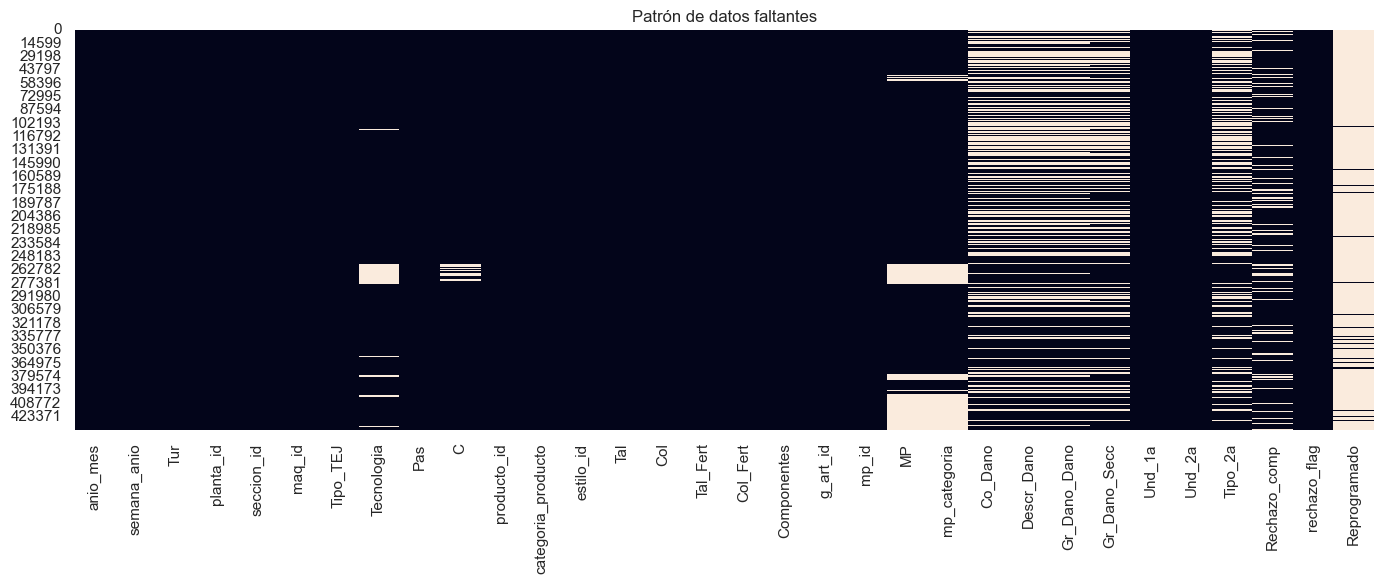

In [7]:
# Mapa de calor de nulos 
plt.figure(figsize=(14, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.title("Patrón de datos faltantes")
plt.tight_layout()
plt.show()


In [9]:
numeric_features, categorical_features = get_feature_lists(data)

print("Numerical Features:")
print(numeric_features)

print("\nCategorical Features:")
print(categorical_features)


Numerical Features:
['anio_mes', 'semana_anio', 'Tur', 'planta_id', 'seccion_id', 'maq_id', 'Pas', 'producto_id', 'estilo_id', 'Tal', 'Col', 'Tal_Fert', 'Col_Fert', 'Componentes', 'g_art_id', 'mp_id', 'Co_Dano', 'Und_1a', 'Und_2a', 'Rechazo_comp', 'rechazo_flag']

Categorical Features:
['Tipo_TEJ', 'Tecnologia', 'C', 'categoria_producto', 'MP', 'mp_categoria', 'Descr_Dano', 'Gr_Dano_Dano', 'Gr_Dano_Secc', 'Tipo_2a', 'Reprogramado']


In [13]:
# Asegurar que la columna objetivo exista
assert TARGET_COL_ORIGINAL in data.columns, f"{TARGET_COL_ORIGINAL} no está en el DataFrame"

data[TARGET_COL_ORIGINAL].value_counts(dropna=False)


Und_2a
0.00      171528
1.00       90988
2.00       43838
3.00       29357
4.00       20541
           ...  
263.00         1
121.00         1
184.00         1
516.00         1
247.00         1
Name: count, Length: 212, dtype: int64

In [14]:
# Proporciones (tasa de rechazo vs no rechazo)
data[TARGET_COL_ORIGINAL].value_counts(normalize=True) * 100


Und_2a
0.00     39.16
1.00     20.78
2.00     10.01
3.00      6.70
4.00      4.69
          ... 
263.00    0.00
121.00    0.00
184.00    0.00
516.00    0.00
247.00    0.00
Name: proportion, Length: 212, dtype: float64

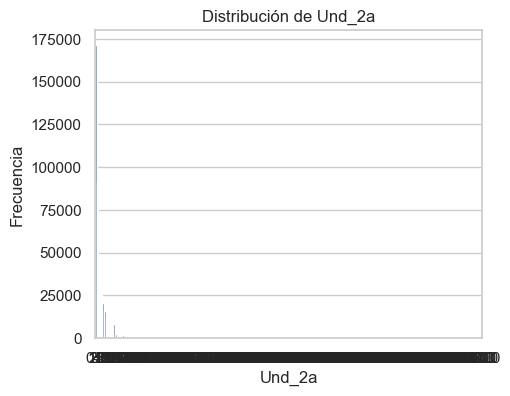

In [15]:
# Gráfico simple de la distribución de la etiqueta
plt.figure(figsize=(5, 4))
sns.countplot(x=data[TARGET_COL_ORIGINAL])
plt.title(f"Distribución de {TARGET_COL_ORIGINAL}")
plt.xlabel(TARGET_COL_ORIGINAL)
plt.ylabel("Frecuencia")
#plt.tight_layout()
plt.show()


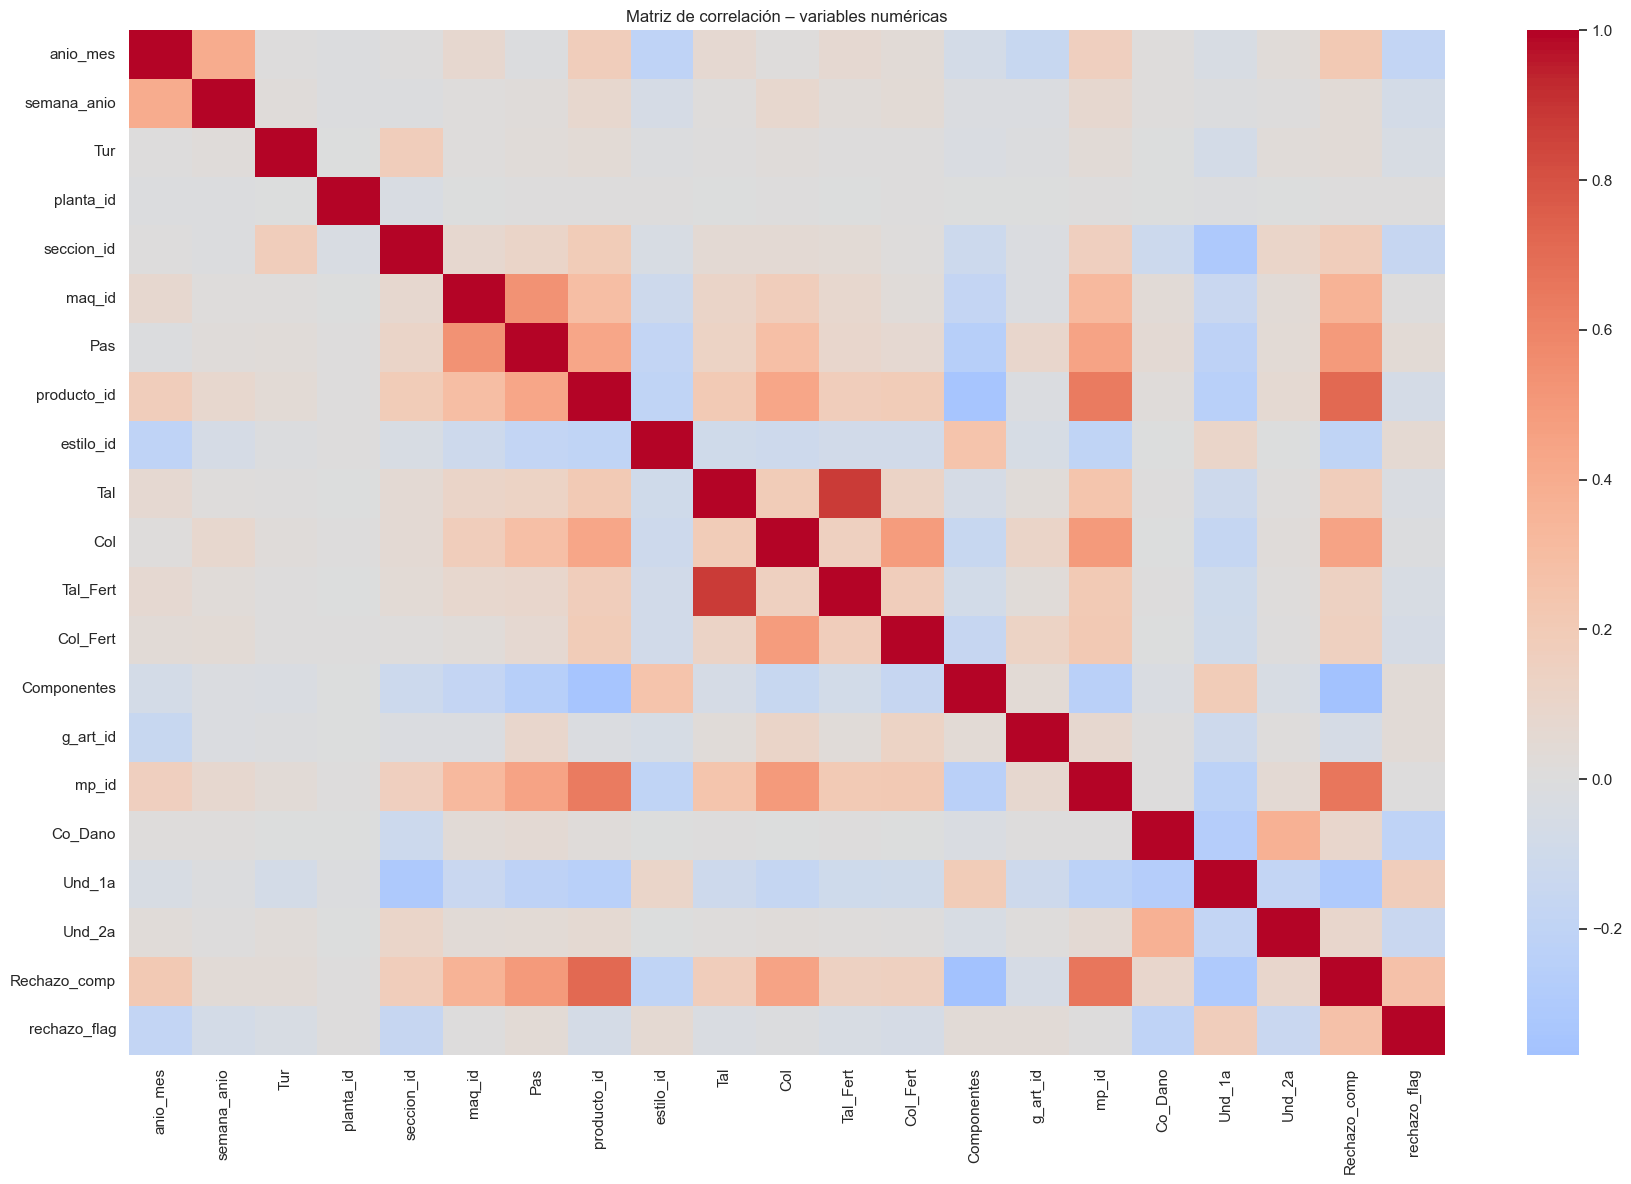

In [16]:
# Correlación solo numéricas
corr = data[numeric_features].corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, square=False)
plt.title("Matriz de correlación – variables numéricas")
plt.tight_layout()
plt.show()


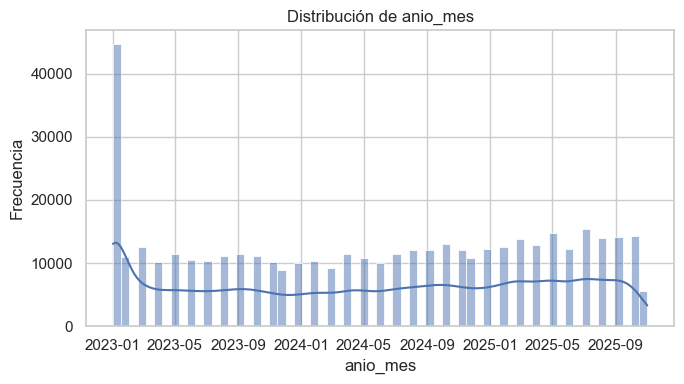

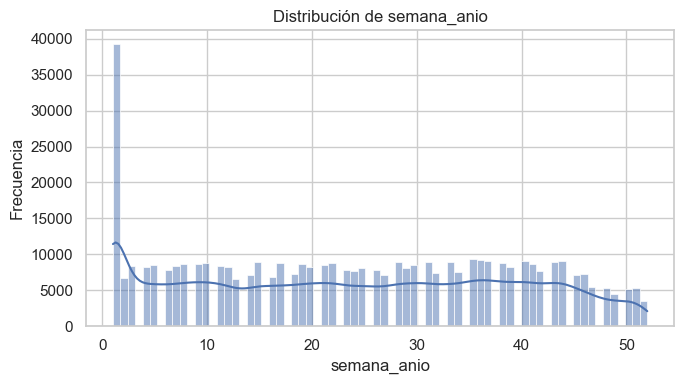

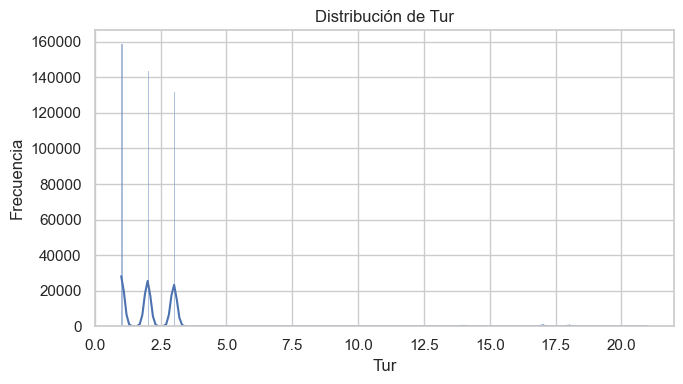

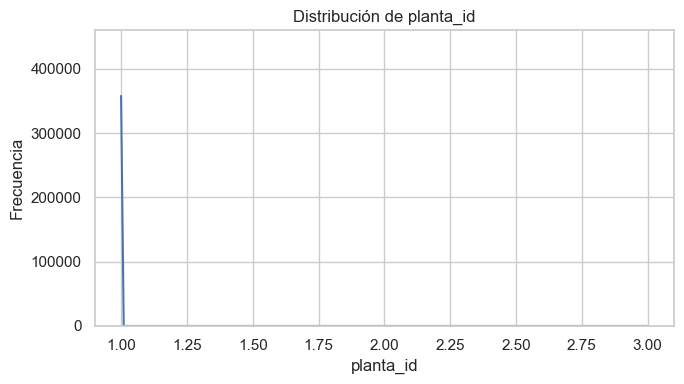

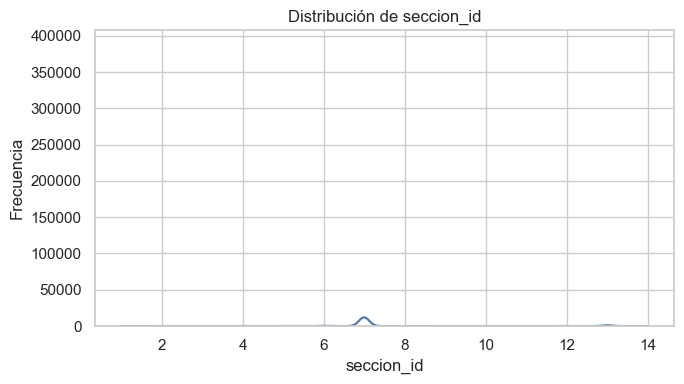

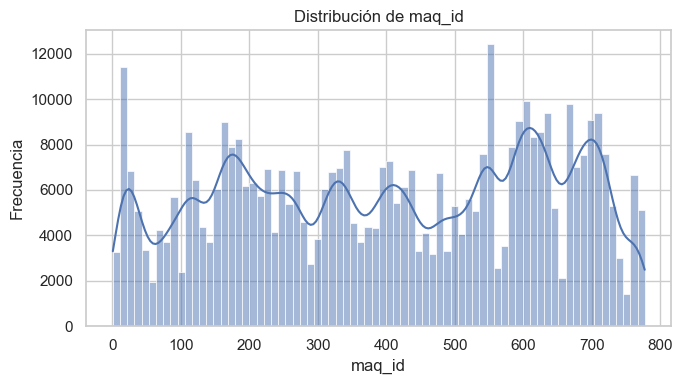

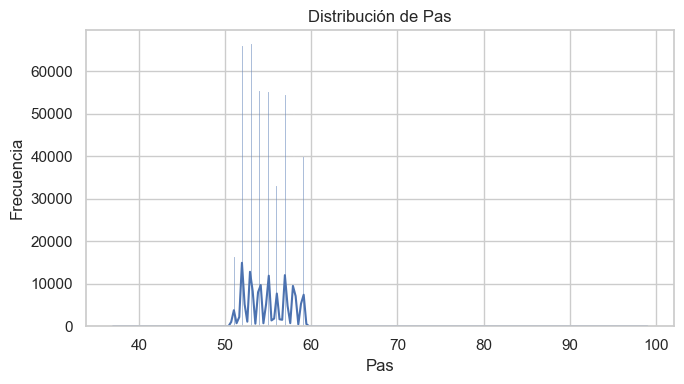

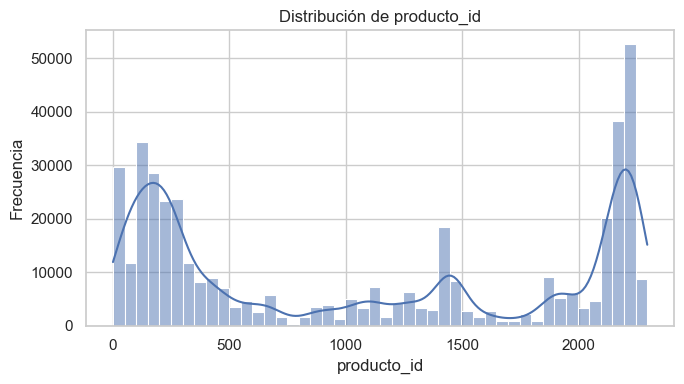

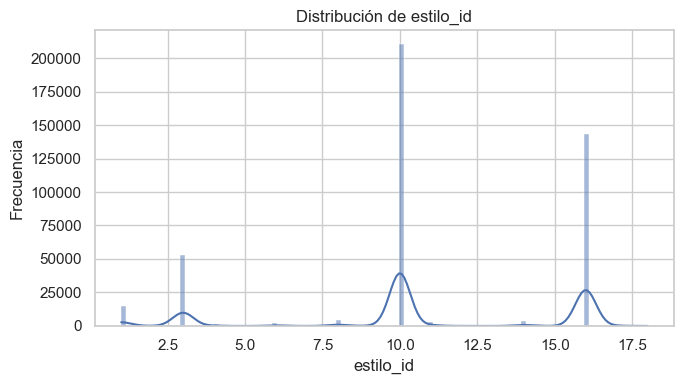

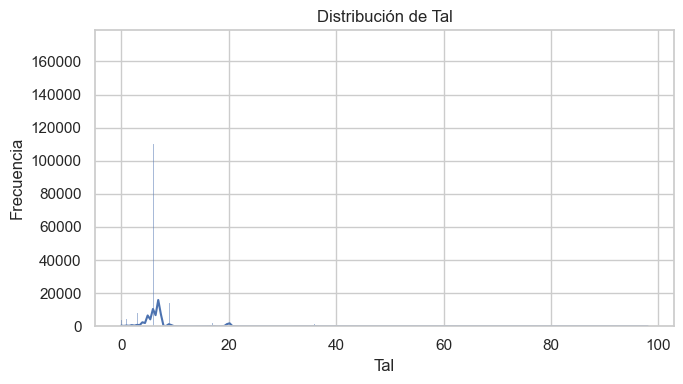

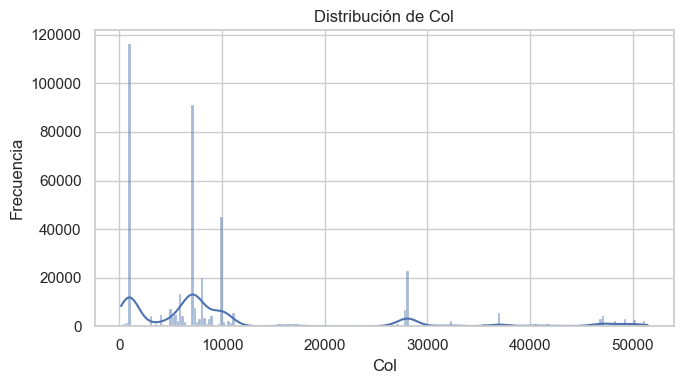

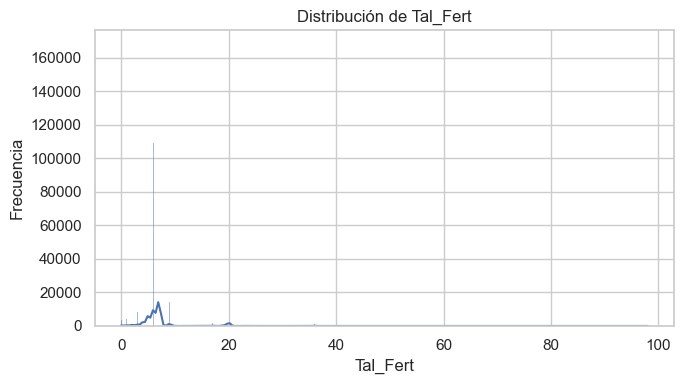

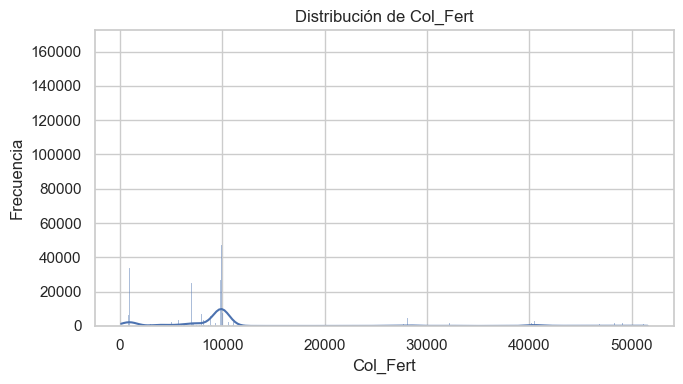

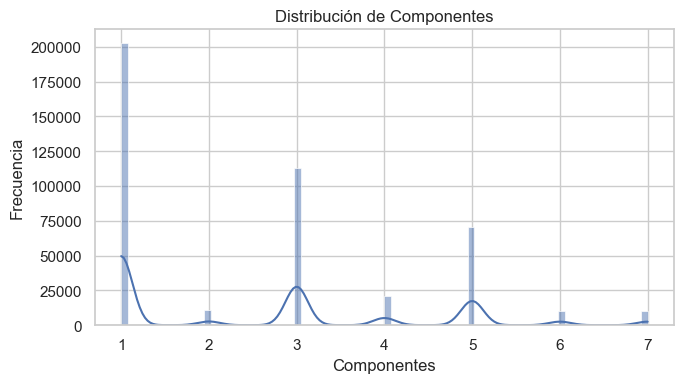

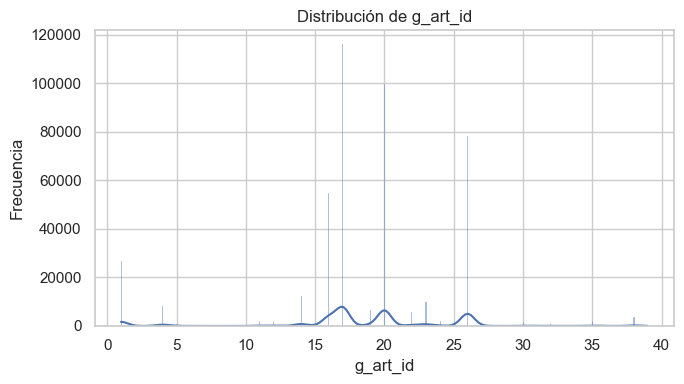

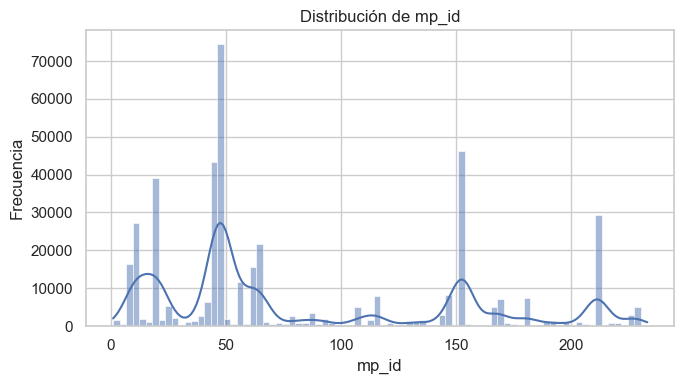

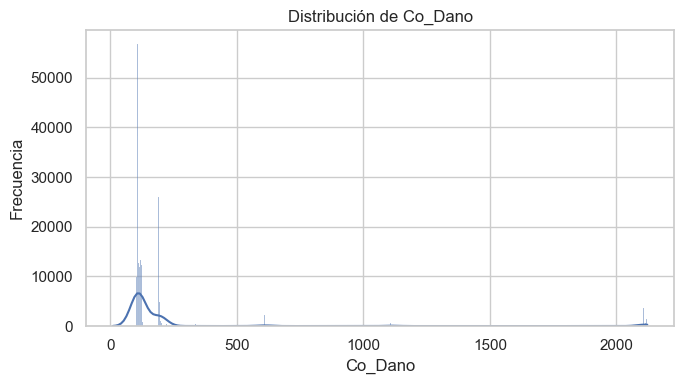

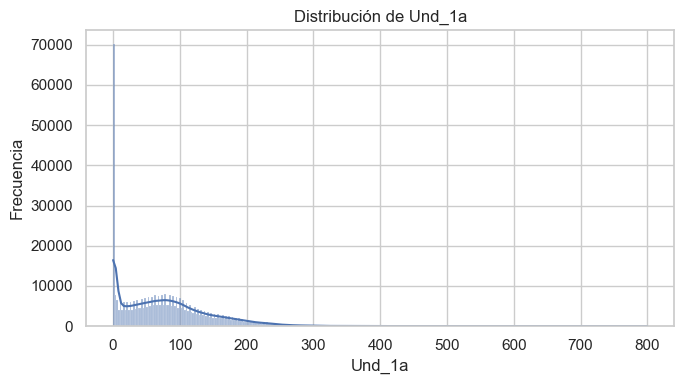

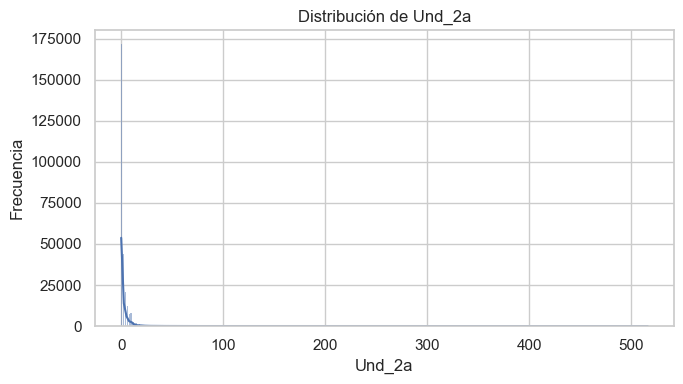

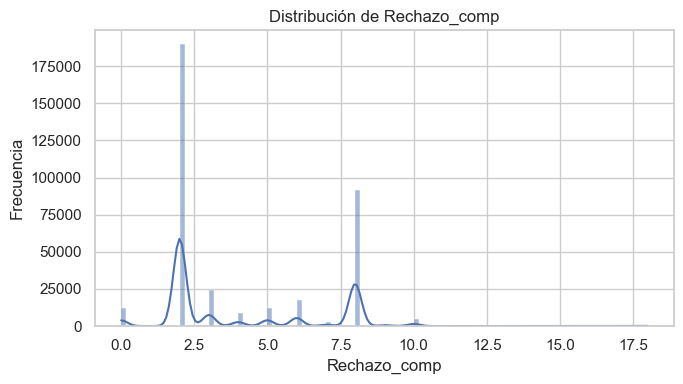

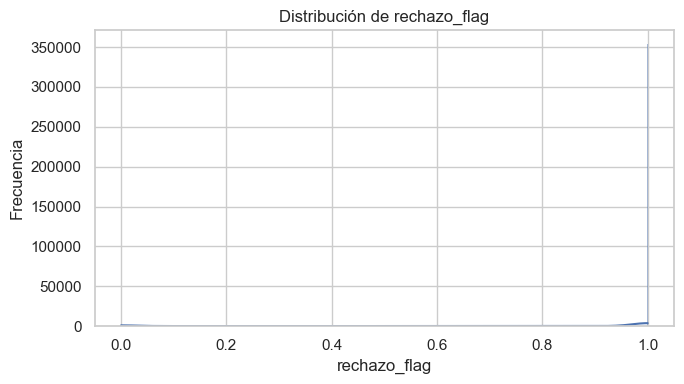

In [17]:
# Histograma por variable numérica 
num_sample = numeric_features.copy()
# Si quieres recortar:
# num_sample = numeric_features[:8]

for col in num_sample:
    plt.figure(figsize=(7, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


In [19]:


# Helper: función de tasa de rechazo por categoría
def rejection_rate_by(df, group_col, target_col=TARGET_COL_ORIGINAL, top_n=10):
    tmp = (
        df.groupby(group_col)[target_col]
        .agg(["count", "mean"])
        .rename(columns={"count": "n_registros", "mean": "tasa_rechazo"})
        .sort_values("tasa_rechazo", ascending=False)
        .head(top_n)
    )
    return tmp


# Ejemplos de dimensiones de negocio
dims_negocio = [
    "planta_id",
    "seccion_id",
    "maq_id",
    "categoria_producto",
    "Tipo_TEJ",
    "Tecnologia",
]

for dim in dims_negocio:
    if dim in data.columns:
        print(f"\n=== {dim} ===")
        display(rejection_rate_by(data, dim))



=== planta_id ===


,n_registros,tasa_rechazo
planta_id,,
1,437928,2.95
2,39,2.85
3,1,2.00



=== seccion_id ===


,n_registros,tasa_rechazo
seccion_id,,
9,1,30.00
6,12374,18.95
10,16,16.94
13,35323,6.62
3,2125,3.50
4,3,3.33
1,36,2.81
7,388077,2.10
14,1,2.00



=== maq_id ===


,n_registros,tasa_rechazo
maq_id,,
100,1,11.00
458,18,8.17
468,27,7.41
740,110,6.76
85,78,6.65
68,57,6.54
239,37,6.38
749,126,6.11
729,1,6.00



=== categoria_producto ===


,n_registros,tasa_rechazo
categoria_producto,,
GEFC1,2,20.50
GLXC1,2,17.00
OZTUS,1,16.00
GEFC3,1,16.00
PBCTA,1,12.00
PBCC2,4,11.75
GEFC2,5,10.20
ROWT2,12,10.17
ALIBR,5,9.60



=== Tipo_TEJ ===


,n_registros,tasa_rechazo
Tipo_TEJ,,
Dibujo vanisado,37,8.76
Desagujado,504,4.71
Calado,116,4.50
Tejido Liso,63,4.10
Tridimensional Dial Alto,385,4.07
Toalla Sandwich,27041,3.71
Media Toalla Sand 2 alm,21781,3.55
Media Toalla Sandwich,166522,3.48
Traforato,642,3.08



=== Tecnologia ===


,n_registros,tasa_rechazo
Tecnologia,,
TECN,27297,3.58
SANGI,132303,3.43
SHIMA,3,3.33
GOAL,224339,2.56
SILV,24215,2.31
BRAV,889,1.48


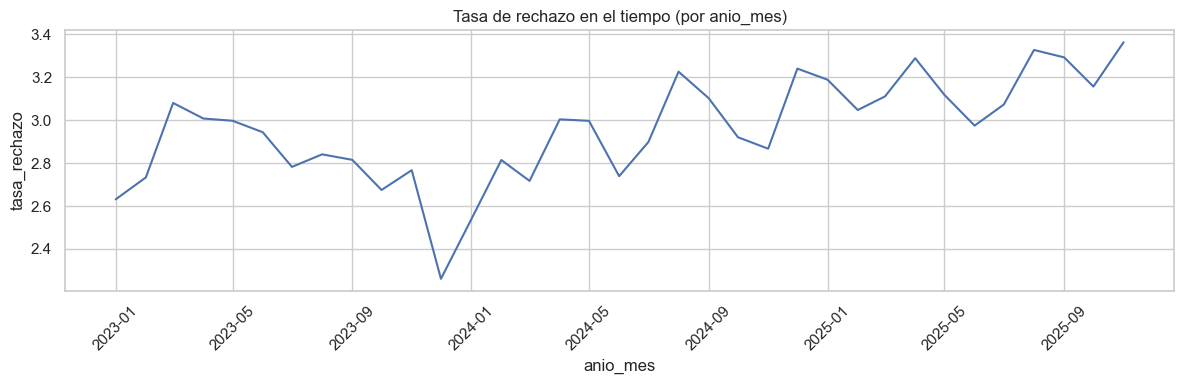

In [20]:
# Si anio_mes está como datetime, se puede agrupar
if "anio_mes" in data.columns and np.issubdtype(data["anio_mes"].dtype, np.datetime64):
    df_time = (
        data
        .groupby("anio_mes")[TARGET_COL_ORIGINAL]
        .agg(["count", "mean"])
        .rename(columns={"mean": "tasa_rechazo"})
        .reset_index()
        .sort_values("anio_mes")
    )

    plt.figure(figsize=(12, 4))
    plt.plot(df_time["anio_mes"], df_time["tasa_rechazo"])
    plt.title("Tasa de rechazo en el tiempo (por anio_mes)")
    plt.xlabel("anio_mes")
    plt.ylabel("tasa_rechazo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_time.tail()


In [21]:
# Resumen rápido: correlación con la etiqueta (solo numéricas)
if TARGET_COL_ORIGINAL in numeric_features:
    corr_target = corr[TARGET_COL_ORIGINAL].sort_values(ascending=False)
else:
    corr_target = data[numeric_features + [TARGET_COL_ORIGINAL]].corr()[TARGET_COL_ORIGINAL].sort_values(ascending=False)

corr_target


Und_2a          1.00
Co_Dano         0.37
seccion_id      0.11
Rechazo_comp    0.09
producto_id     0.06
mp_id           0.05
Pas             0.04
maq_id          0.04
anio_mes        0.02
Tur             0.02
Col             0.02
Tal             0.02
Tal_Fert        0.01
g_art_id        0.01
semana_anio     0.01
Col_Fert        0.01
planta_id      -0.00
estilo_id      -0.00
Componentes    -0.04
rechazo_flag   -0.15
Und_1a         -0.18
Name: Und_2a, dtype: float64